# Added for ME249 P1 Task 1.1
**ME249 Project 1 – Task 1.1 概述**
- **日期**: 2025-10-03
- **版本**: v1.0
- **变更日志**:
  - 新增初始化单元，统一随机种子与绘图风格，生成任务输出目录。
  - 重构沸腾数据整理，输出 numpy/pandas 结构及对数数据集。
  - 添加统计摘要、log-log 可视化并将文件保存至 `outputs/1.1/`。


In [2]:
# Added for ME249 P1 Task 1.1
from pathlib import Path
import json
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

OUTPUT_DIR = Path('outputs/1.1')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'figure.dpi': 120,
    'axes.grid': True,
})

def savefig(ax, filename: str):
    """Save matplotlib axis as PNG and PDF inside the task-specific output directory."""
    OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
    for ext in ('png', 'pdf'):
        ax.figure.savefig(OUTPUT_DIR / f"{filename}.{ext}", bbox_inches='tight')
    return ax

def rmse(y, yhat):
    y = np.asarray(y, dtype=float)
    yhat = np.asarray(yhat, dtype=float)
    return np.sqrt(np.mean(np.square(y - yhat)))

def mape(y, yhat):
    y = np.asarray(y, dtype=float)
    yhat = np.asarray(yhat, dtype=float)
    return np.mean(np.abs((y - yhat) / y)) * 100.0

def describe_array(name, arr):
    arr = np.asarray(arr, dtype=float)
    print(f"{name} -> count={arr.size}, mean={arr.mean():.4f}, std={arr.std(ddof=1):.4f}, min={arr.min():.4f}, max={arr.max():.4f}")


ModuleNotFoundError: No module named 'pandas'

In [ ]:
'''>>>>> start CodeP1.1F25
    V.P. Carey ME249, Fall 2025''' 
# Modified for ME249 P1 Task 1.1
boiling_columns = ['q_pp', 'delta_T', 'g', 'gamma', 'P']

boiling_records = [
    [44.2, 32.5, 0.098, 1.79, 5.5],
    [47.4, 33.2, 0.098, 1.79, 5.5],
    [49.4, 34.2, 0.098, 1.79, 5.5],
    [59.2, 34.8, 0.098, 1.79, 5.5],
    [67.8, 36.3, 0.098, 1.79, 5.5],
    [73.6, 37.3, 0.098, 1.79, 5.5],
    [76.3, 37.8, 0.098, 1.79, 5.5],
    [85.3, 39.2, 0.098, 1.79, 5.5],
    [96.5, 39.3, 0.098, 1.79, 5.5],
    [111.0, 42.3, 0.098, 1.79, 5.5],
    [124.0, 43.5, 0.098, 1.79, 5.5],
    [136.2, 45.4, 0.098, 1.79, 5.5],
    [143.5, 46.7, 0.098, 1.79, 5.5],
    [154.6, 47.9, 0.098, 1.79, 5.5],
    [163.1, 48.6, 0.098, 1.79, 5.5],
    [172.8, 50.9, 0.098, 1.79, 5.5],
    [184.2, 51.7, 0.098, 1.79, 5.5],
    [203.7, 56.4, 0.098, 1.79, 5.5],
    [36.7, 30.2, 9.8, 1.79, 5.5],
    [55.1, 34.1, 9.8, 1.79, 5.5],
    [67.5, 35.3, 9.8, 1.79, 5.5],
    [78.0, 37.8, 9.8, 1.79, 5.5],
    [92.0, 38.1, 9.8, 1.79, 5.5],
    [120.0, 44.1, 9.8, 1.79, 5.5],
    [134.3, 46.9, 9.8, 1.79, 5.5],
    [150.3, 48.5, 9.8, 1.79, 5.5],
    [167.0, 49.2, 9.8, 1.79, 5.5],
    [184.0, 52.7, 9.8, 1.79, 5.5],
    [196.5, 53.1, 9.8, 1.79, 5.5],
    [42.4, 29.7, 19.6, 1.79, 5.5],
    [48.7, 31.0, 19.6, 1.79, 5.5],
    [54.5, 31.2, 19.6, 1.79, 5.5],
    [70.8, 32.4, 19.6, 1.79, 5.5],
    [73.7, 31.4, 19.6, 1.79, 5.5],
    [81.8, 32.5, 19.6, 1.79, 5.5],
    [91.9, 36.3, 19.6, 1.79, 5.5],
    [103.9, 36.3, 19.6, 1.79, 5.5],
    [119.1, 37.2, 19.6, 1.79, 5.5],
    [133.7, 38.4, 19.6, 1.79, 5.5],
    [139.9, 39.7, 19.6, 1.79, 5.5],
    [148.3, 40.9, 19.6, 1.79, 5.5],
    [157.0, 41.6, 19.6, 1.79, 5.5],
    [169.1, 43.9, 19.6, 1.79, 5.5],
    [179.2, 45.0, 19.6, 1.79, 5.5],
    [205.0, 47.9, 19.6, 1.79, 5.5]
]

boiling_array = np.array(boiling_records, dtype=float)
boiling_df = pd.DataFrame(boiling_array, columns=boiling_columns)

ND = boiling_array.shape[0]
DI = boiling_array.shape[1]
NS = ND

print(f'数据点数量 ND = {ND}, 每条向量维度 DI = {DI}')


数据点数量 ND = 45, 每条向量维度 DI = 5


In [ ]:
# Added for ME249 P1 Task 1.1
print('原始沸腾数据（前五行）:')
display(boiling_df.head())
print()
print('原始沸腾数据（最后一行）:')
display(boiling_df.tail(1))
print()
print('数值描述统计:')
display(boiling_df.describe().T)

describe_array('q_pp', boiling_df['q_pp'])
describe_array('delta_T', boiling_df['delta_T'])


原始沸腾数据（前五行）:


,q_pp,delta_T,g,gamma,P
0,44.2,32.5,0.098,1.79,5.5
1,47.4,33.2,0.098,1.79,5.5
2,49.4,34.2,0.098,1.79,5.5
3,59.2,34.8,0.098,1.79,5.5
4,67.8,36.3,0.098,1.79,5.5



原始沸腾数据（最后一行）:


,q_pp,delta_T,g,gamma,P
44,205.0,47.9,19.6,1.79,5.5



数值描述统计:


,count,mean,std,min,25%,50%,75%,max
q_pp,45.0,113.182222,5.048156e+01,36.700,70.800,111.00,154.60,205.00
delta_T,45.0,40.520000,7.139092e+00,29.700,34.800,39.20,46.70,56.40
g,45.0,9.403644,8.559802e+00,0.098,0.098,9.80,19.60,19.60
gamma,45.0,1.790000,8.982147e-16,1.790,1.790,1.79,1.79,1.79
P,45.0,5.500000,0.000000e+00,5.500,5.500,5.50,5.50,5.50


q_pp -> count=45, mean=113.1822, std=50.4816, min=36.7000, max=205.0000
delta_T -> count=45, mean=40.5200, std=7.1391, min=29.7000, max=56.4000


In [ ]:
# Added for ME249 P1 Task 1.1
log_df = pd.DataFrame({
    'ln_q_pp': np.log(boiling_df['q_pp']),
    'ln_delta_T': np.log(boiling_df['delta_T']),
    'ln_g': np.log(boiling_df['g']),
    'ln_P': np.log(boiling_df['P']),
})
boiling_log_array = log_df.to_numpy()

print('对数数据示例（前五行）:')
display(log_df.head())
print()
print('对数数据（最后一行）:')
display(log_df.tail(1))
print()
print('对数数据描述统计:')
display(log_df.describe().T)


对数数据示例（前五行）:


,ln_q_pp,ln_delta_T,ln_g,ln_P
0,3.788725,3.481240,-2.322788,1.704748
1,3.858622,3.502550,-2.322788,1.704748
2,3.899950,3.532226,-2.322788,1.704748
3,4.080922,3.549617,-2.322788,1.704748
4,4.216562,3.591818,-2.322788,1.704748



对数数据（最后一行）:


,ln_q_pp,ln_delta_T,ln_g,ln_P
44,5.32301,3.869116,2.97553,1.704748



对数数据描述统计:


,count,mean,std,min,25%,50%,75%,max
ln_q_pp,45.0,4.618083,4.951130e-01,3.602777,4.259859,4.709530,5.040841,5.323010
ln_delta_T,45.0,3.686807,1.747368e-01,3.391147,3.549617,3.668677,3.843744,4.032469
ln_g,45.0,0.686767,2.499338e+00,-2.322788,-2.322788,2.282382,2.975530,2.975530
ln_P,45.0,1.704748,8.982147e-16,1.704748,1.704748,1.704748,1.704748,1.704748


In [ ]:
# Added for ME249 P1 Task 1.1
raw_csv_path = OUTPUT_DIR / 'boil_45_raw.csv'
raw_npy_path = OUTPUT_DIR / 'boil_45_raw.npy'
log_csv_path = OUTPUT_DIR / 'boil_45_log.csv'
log_npy_path = OUTPUT_DIR / 'boil_45_log.npy'

boiling_df.to_csv(raw_csv_path, index=False)
np.save(raw_npy_path, boiling_array)
log_df.to_csv(log_csv_path, index=False)
np.save(log_npy_path, boiling_log_array)

print(f'已保存原始数据到 {raw_csv_path}')
print(f'已保存原始 numpy 数组到 {raw_npy_path}')
print(f'已保存对数数据到 {log_csv_path}')
print(f'已保存对数 numpy 数组到 {log_npy_path}')


已保存原始数据到 outputs/1.1/boil_45_raw.csv
已保存原始 numpy 数组到 outputs/1.1/boil_45_raw.npy
已保存对数数据到 outputs/1.1/boil_45_log.csv
已保存对数 numpy 数组到 outputs/1.1/boil_45_log.npy


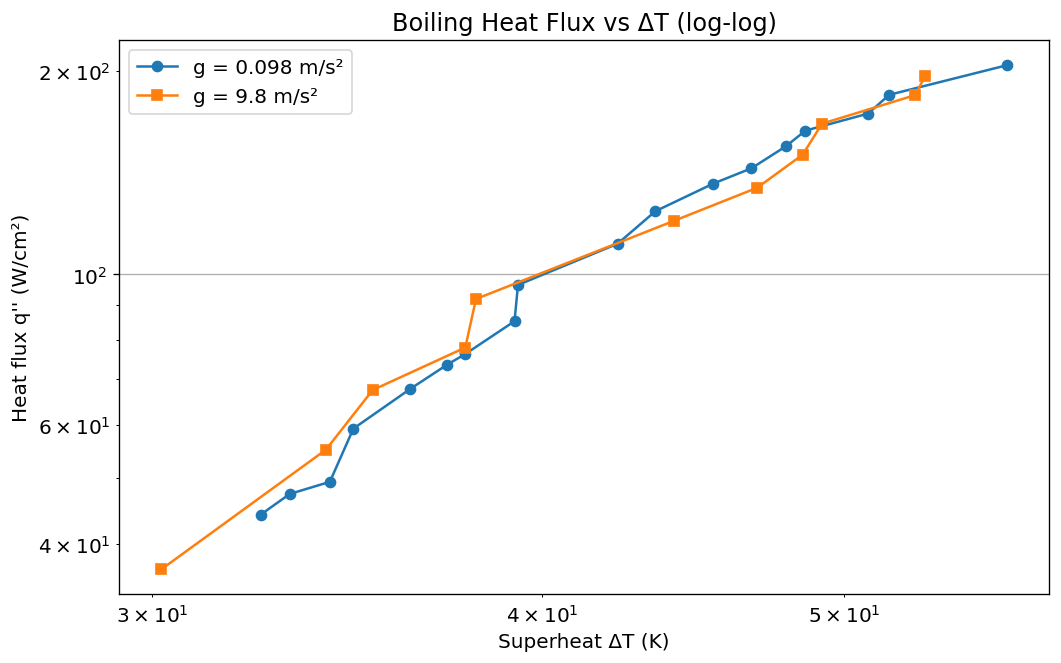

In [ ]:
# Added for ME249 P1 Task 1.1
fig, ax = plt.subplots()
style_map = {0.098: {'marker': 'o', 'color': 'tab:blue'}, 9.8: {'marker': 's', 'color': 'tab:orange'}}
for g_value, style in style_map.items():
    subset = boiling_df[np.isclose(boiling_df['g'], g_value)].sort_values('delta_T')
    ax.plot(
        subset['delta_T'],
        subset['q_pp'],
        label=f"g = {g_value} m/s²",
        marker=style['marker'],
        color=style['color'],
        linewidth=1.5,
    )

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Superheat ΔT (K)')
ax.set_ylabel("Heat flux q'' (W/cm²)")
ax.set_title('Boiling Heat Flux vs ΔT (log-log)')
ax.legend()

savefig(ax, 'task11_loglog_q_vs_dT_by_g')
plt.show()
